Import Packages

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [23]:
parent_dir = '../../data/ping_pong/'

NMSG = 1_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [24]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 09:29:48 2025 +0100) (509.69ms ela...,3.590,0.0538,0.731,6.18,0.55,37.97,69.56 C,Nominal
1,(Fri Mar 14 09:29:48 2025 +0100) (506.15ms ela...,7.510,0.0941,1.010,9.96,1.12,64.26,69.56 C,Nominal
2,(Fri Mar 14 09:29:49 2025 +0100) (505.25ms ela...,4.760,0.1040,0.916,7.21,0.94,46.81,69.05 C,Nominal
3,(Fri Mar 14 09:29:49 2025 +0100) (508.27ms ela...,0.780,0.0663,0.776,3.08,0.53,25.94,69.05 C,Nominal
4,(Fri Mar 14 09:29:50 2025 +0100) (509.21ms ela...,0.213,0.0000,0.533,2.10,0.15,8.91,68.50 C,Nominal


In [25]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(28, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 09:29:59 2025 +0100) (506.19ms ela...,39.2,0.126000,1.660,41.98,3.97,99.30,66.88 C,Nominal
1,(Fri Mar 14 09:30:00 2025 +0100) (505.15ms ela...,37.3,0.088000,1.090,39.91,3.89,97.84,66.88 C,Nominal
2,(Fri Mar 14 09:30:00 2025 +0100) (503.83ms ela...,36.9,0.127000,1.420,39.71,3.85,98.01,71.24 C,Nominal
3,(Fri Mar 14 09:30:01 2025 +0100) (504.23ms ela...,37.0,0.012300,0.848,39.33,3.86,98.73,71.24 C,Nominal
4,(Fri Mar 14 09:30:01 2025 +0100) (504.97ms ela...,35.9,0.000363,0.696,38.16,3.82,99.16,74.58 C,Nominal


In [26]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 09:28:32 2025 +0100) (508.63ms ela...,9.05,0.0755,1.140,11.40,1.19,53.63,57.53 C,Nominal
1,(Fri Mar 14 09:28:32 2025 +0100) (504.54ms ela...,7.41,0.0584,0.958,9.74,1.01,54.14,57.53 C,Nominal
2,(Fri Mar 14 09:28:33 2025 +0100) (506.09ms ela...,1.24,0.0756,0.845,3.65,0.62,41.05,57.53 C,Nominal
3,(Fri Mar 14 09:28:33 2025 +0100) (507.71ms ela...,2.96,0.0708,0.935,5.36,0.92,49.97,57.53 C,Nominal
4,(Fri Mar 14 09:28:34 2025 +0100) (507.48ms ela...,1.74,0.1100,1.010,4.29,1.05,51.18,57.49 C,Nominal


In [27]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(23, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 09:28:43 2025 +0100) (506.44ms ela...,25.5,0.105,1.070,30.78,2.77,97.89,61.68 C,Nominal
1,(Fri Mar 14 09:28:44 2025 +0100) (504.56ms ela...,18.9,0.113,0.918,22.23,1.86,95.97,64.42 C,Nominal
2,(Fri Mar 14 09:28:44 2025 +0100) (505.75ms ela...,18.4,0.100,1.040,21.81,1.89,96.53,64.42 C,Nominal
3,(Fri Mar 14 09:28:45 2025 +0100) (505.72ms ela...,23.3,0.076,1.220,26.74,2.23,96.96,67.28 C,Nominal
4,(Fri Mar 14 09:28:45 2025 +0100) (506.09ms ela...,17.0,0.318,0.683,21.33,1.68,96.41,67.28 C,Nominal


Clean the Data

In [28]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [29]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [30]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 09:29:48,3.590,0.0538,0.731,6.18,0.55,37.97,69.56,Nominal,509.69
1,2025-03-14 09:29:48,7.510,0.0941,1.010,9.96,1.12,64.26,69.56,Nominal,506.15
2,2025-03-14 09:29:49,4.760,0.1040,0.916,7.21,0.94,46.81,69.05,Nominal,505.25
3,2025-03-14 09:29:49,0.780,0.0663,0.776,3.08,0.53,25.94,69.05,Nominal,508.27
4,2025-03-14 09:29:50,0.213,0.0000,0.533,2.10,0.15,8.91,68.50,Nominal,509.21


In [31]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(28, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 09:29:59,39.2,0.126000,1.660,41.98,3.97,99.30,66.88,Nominal,506.19
1,2025-03-14 09:30:00,37.3,0.088000,1.090,39.91,3.89,97.84,66.88,Nominal,505.15
2,2025-03-14 09:30:00,36.9,0.127000,1.420,39.71,3.85,98.01,71.24,Nominal,503.83
3,2025-03-14 09:30:01,37.0,0.012300,0.848,39.33,3.86,98.73,71.24,Nominal,504.23
4,2025-03-14 09:30:01,35.9,0.000363,0.696,38.16,3.82,99.16,74.58,Nominal,504.97


In [32]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 09:28:32,9.05,0.0755,1.140,11.40,1.19,53.63,57.53,Nominal,508.63
1,2025-03-14 09:28:32,7.41,0.0584,0.958,9.74,1.01,54.14,57.53,Nominal,504.54
2,2025-03-14 09:28:33,1.24,0.0756,0.845,3.65,0.62,41.05,57.53,Nominal,506.09
3,2025-03-14 09:28:33,2.96,0.0708,0.935,5.36,0.92,49.97,57.53,Nominal,507.71
4,2025-03-14 09:28:34,1.74,0.1100,1.010,4.29,1.05,51.18,57.49,Nominal,507.48


In [33]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(23, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 09:28:43,25.5,0.105,1.070,30.78,2.77,97.89,61.68,Nominal,506.44
1,2025-03-14 09:28:44,18.9,0.113,0.918,22.23,1.86,95.97,64.42,Nominal,504.56
2,2025-03-14 09:28:44,18.4,0.100,1.040,21.81,1.89,96.53,64.42,Nominal,505.75
3,2025-03-14 09:28:45,23.3,0.076,1.220,26.74,2.23,96.96,67.28,Nominal,505.72
4,2025-03-14 09:28:45,17.0,0.318,0.683,21.33,1.68,96.41,67.28,Nominal,506.09


Visualize the Data

In [34]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


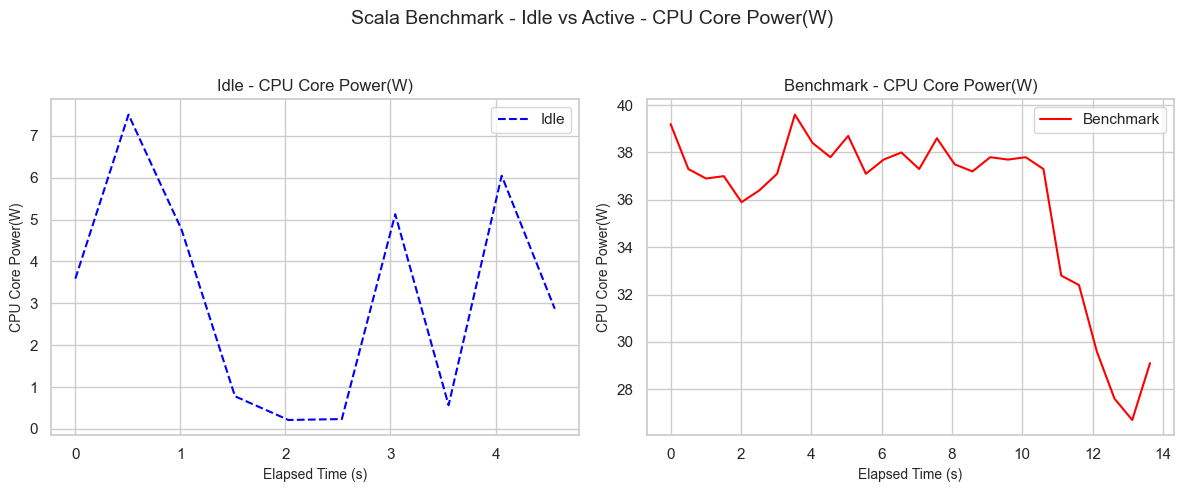

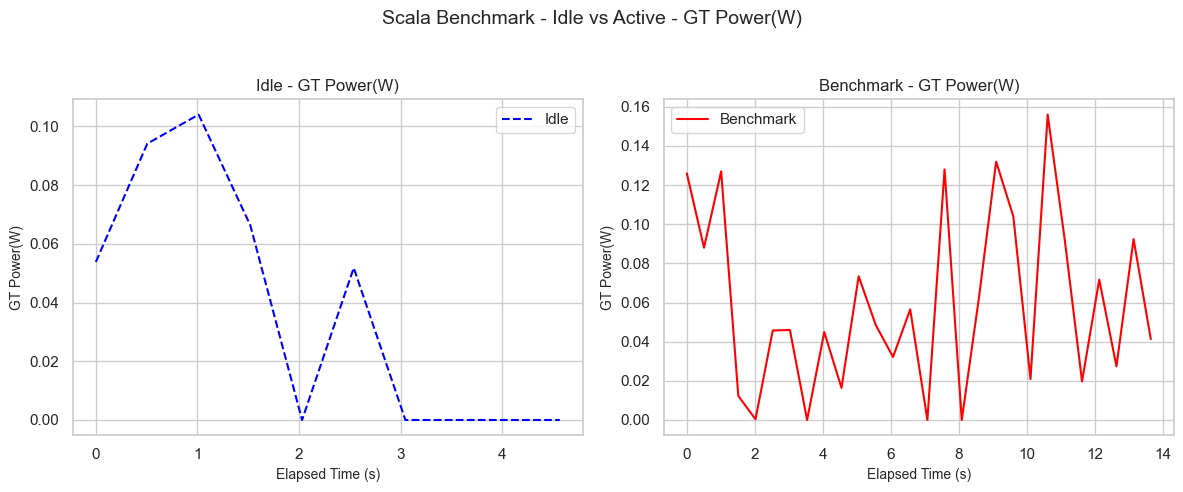

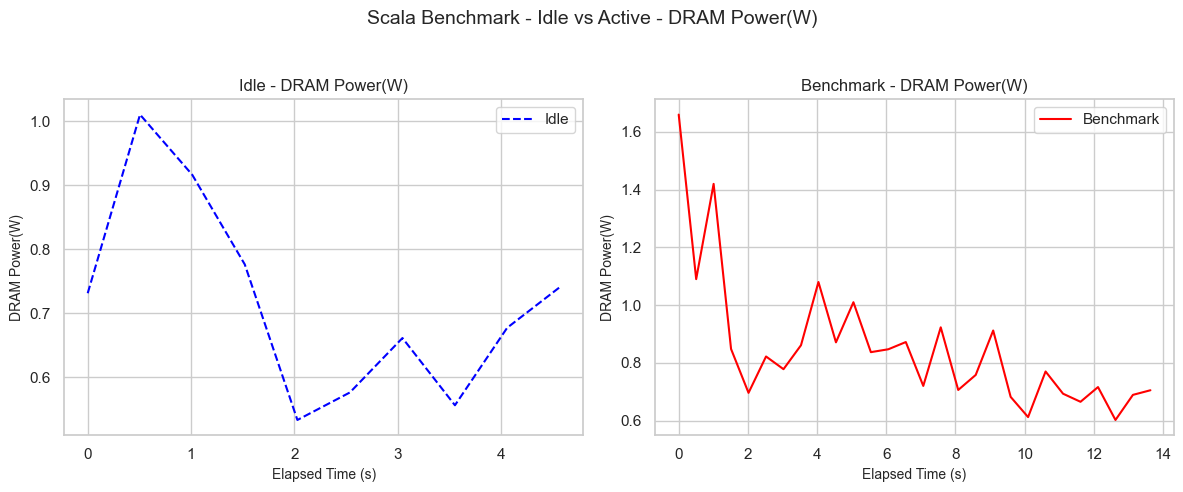

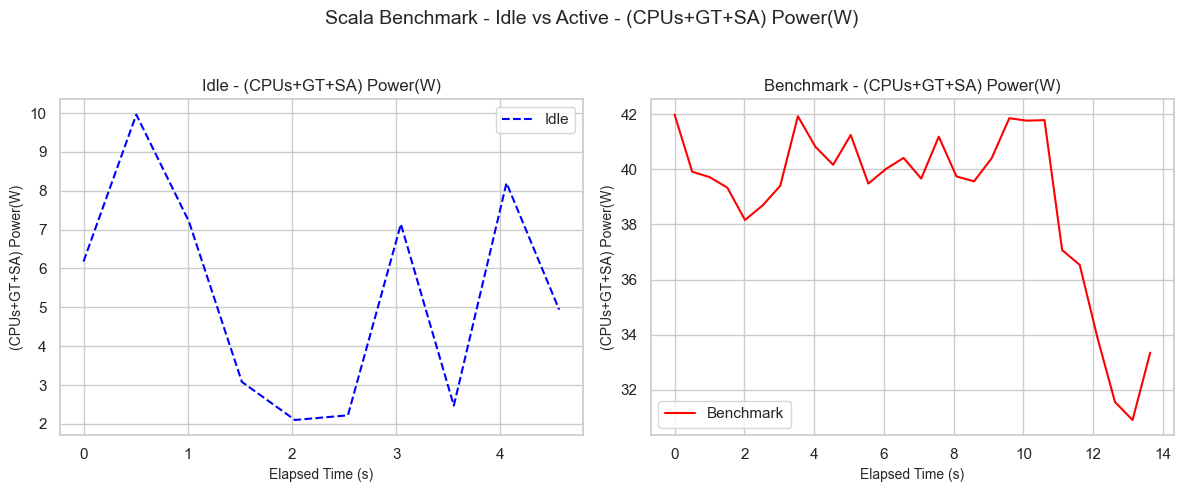

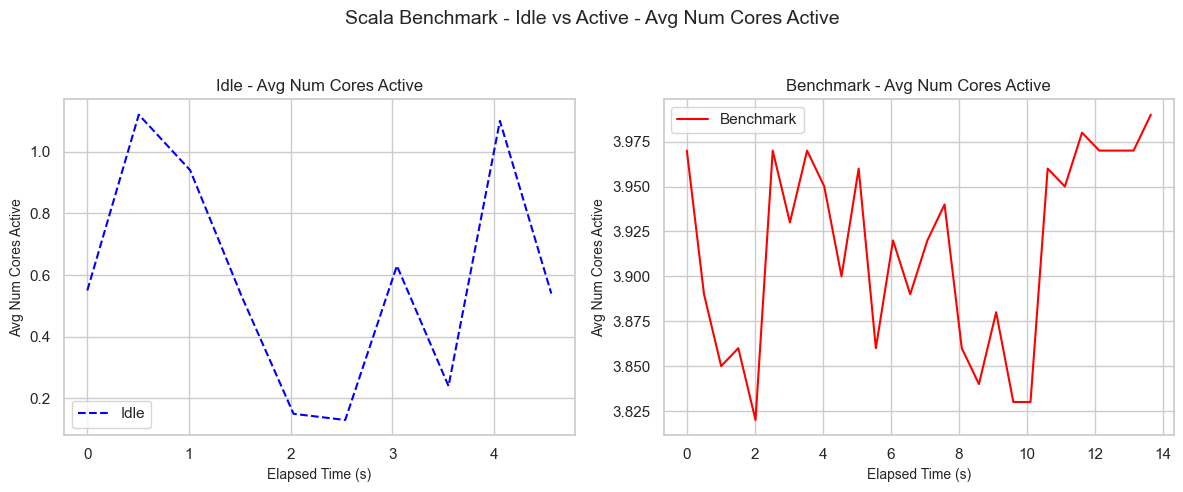

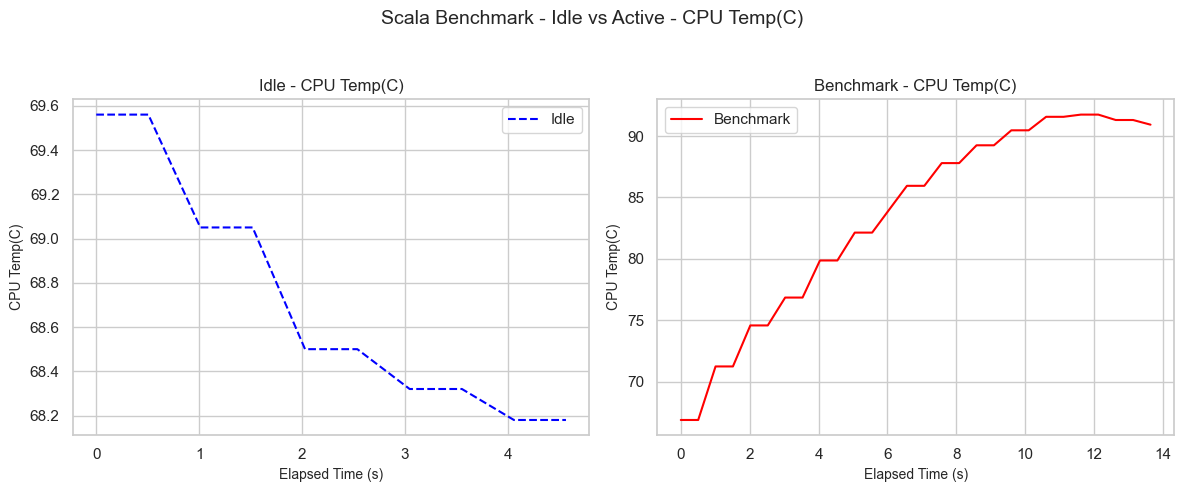

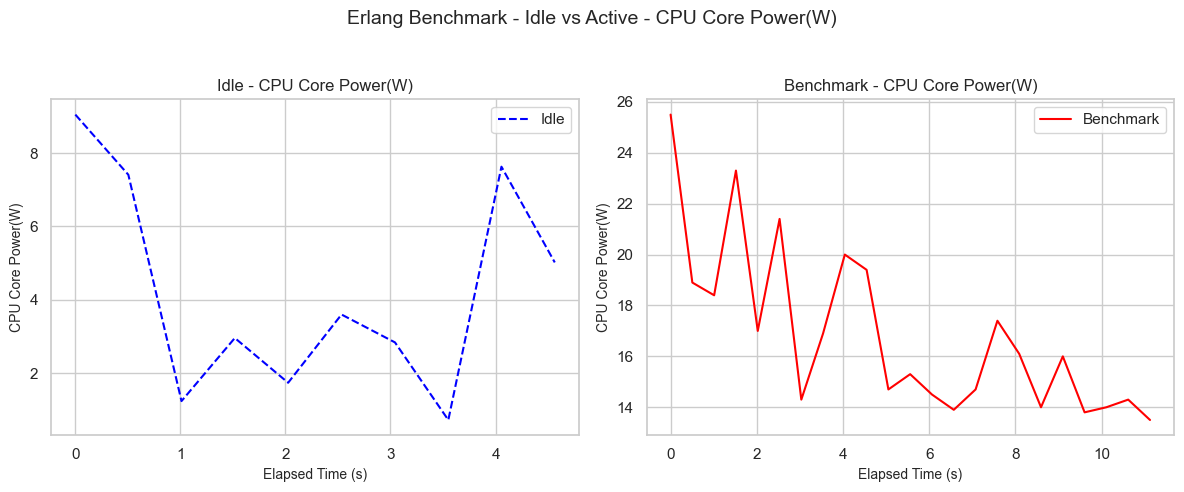

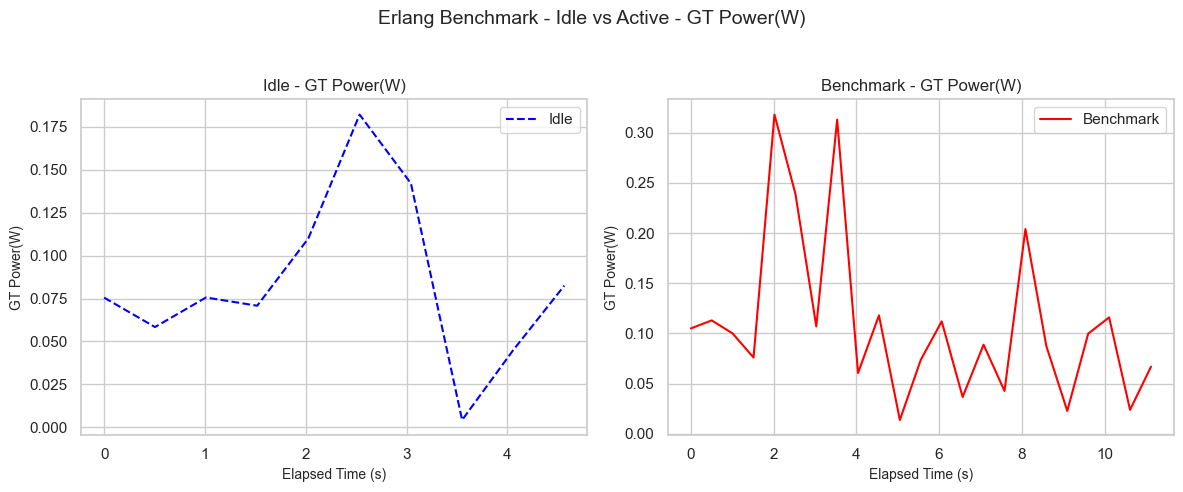

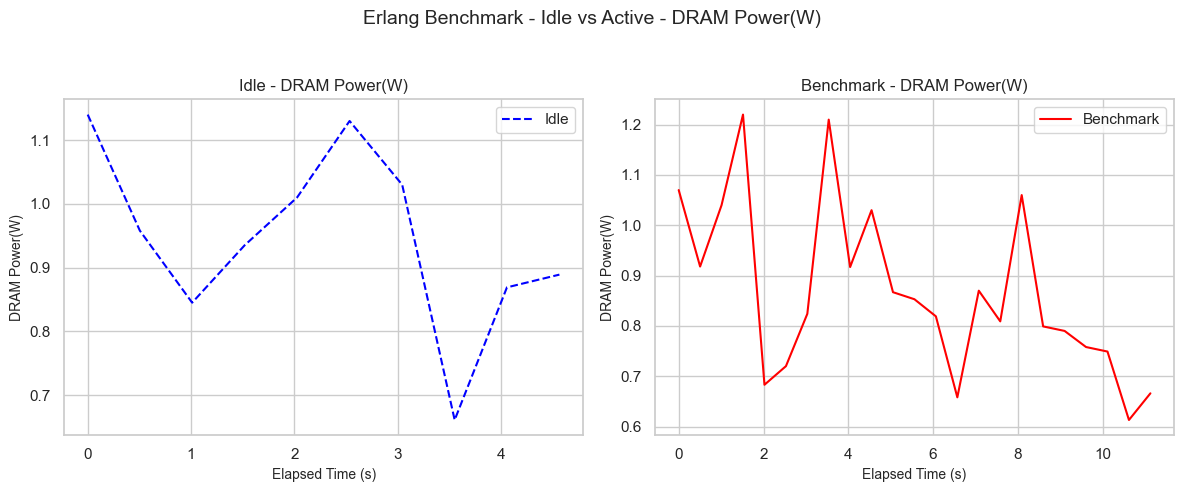

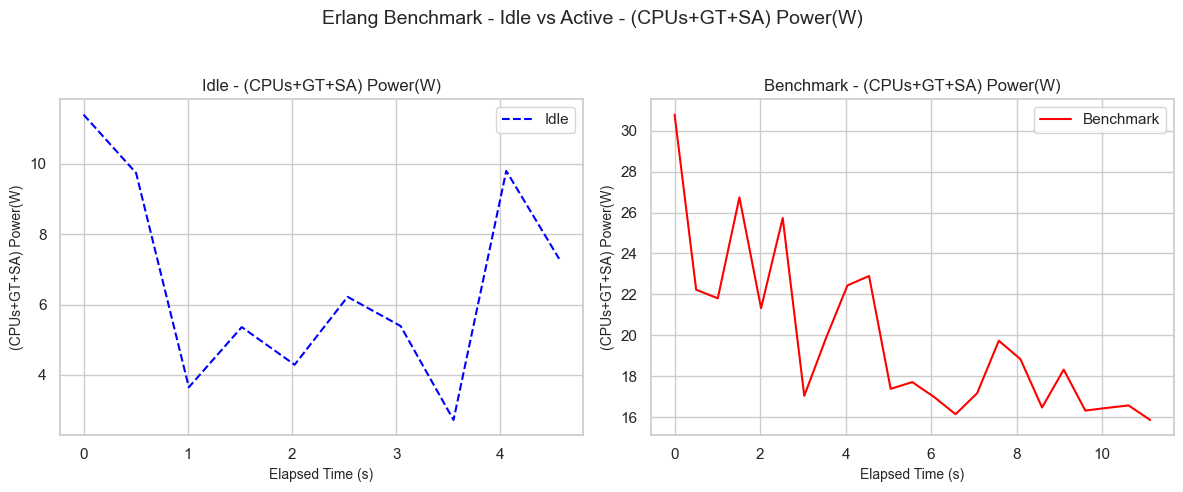

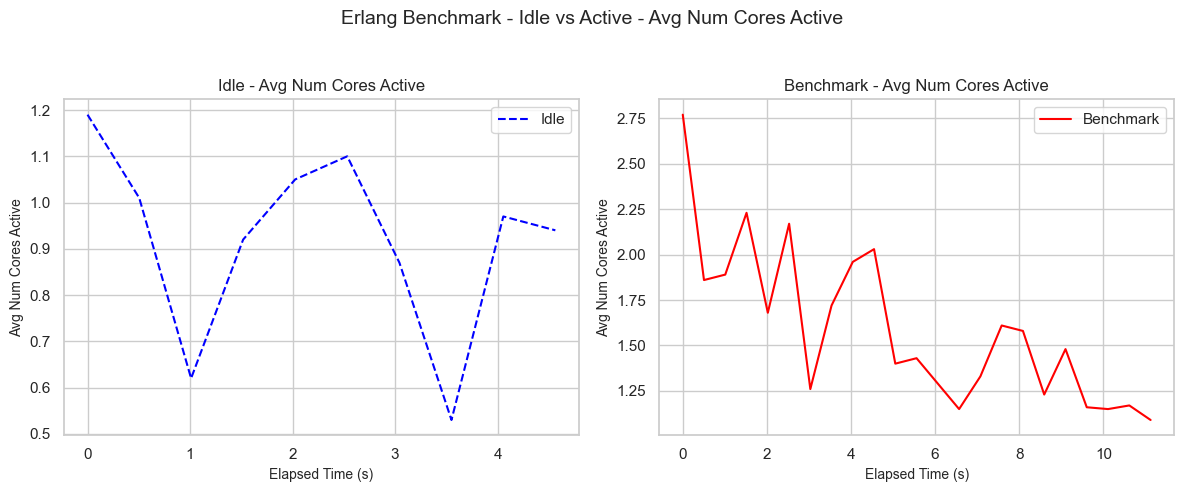

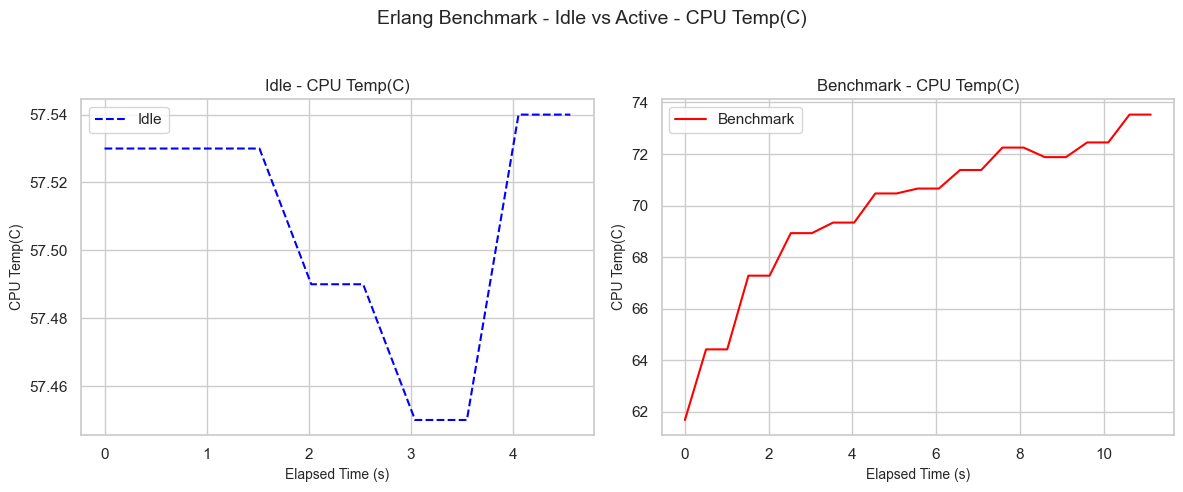

In [35]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [36]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [37]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

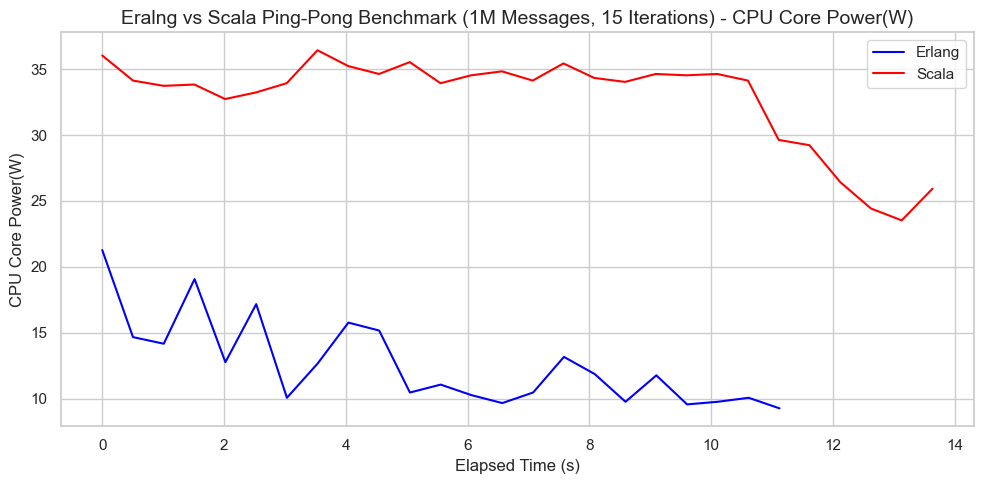

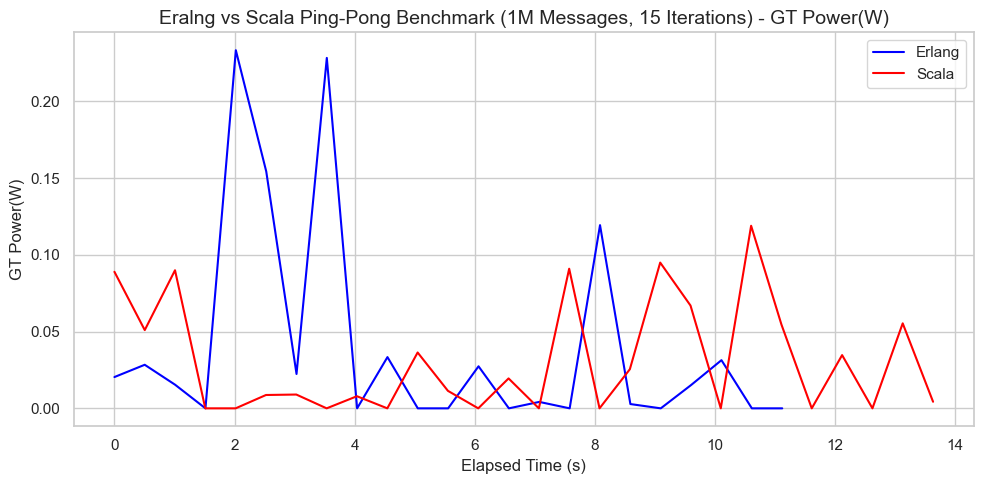

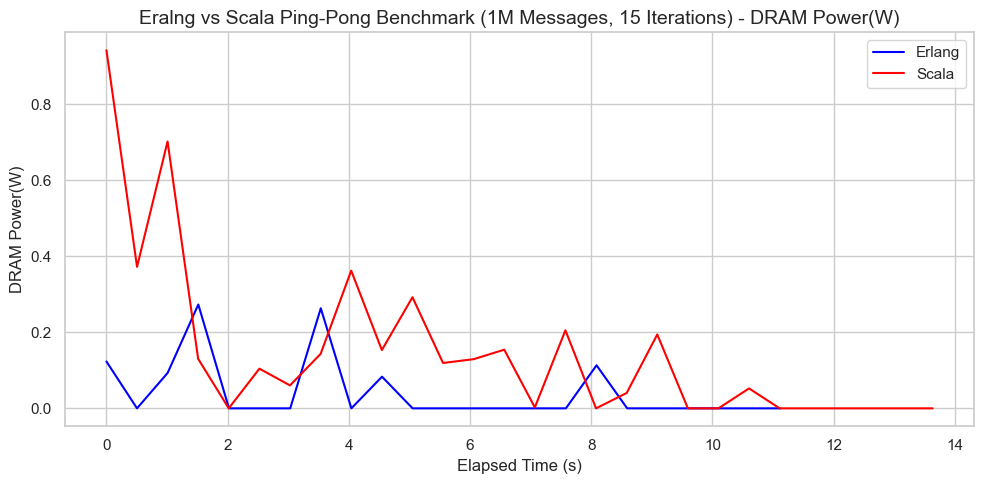

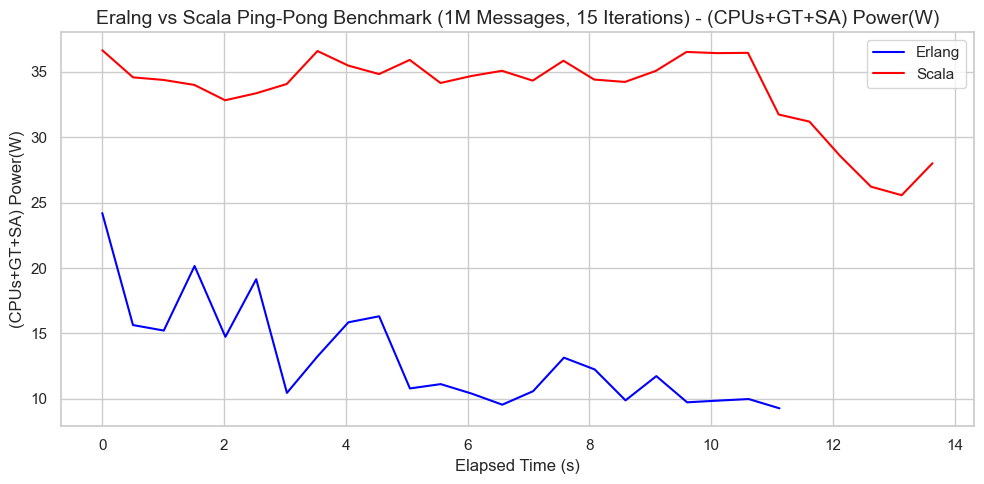

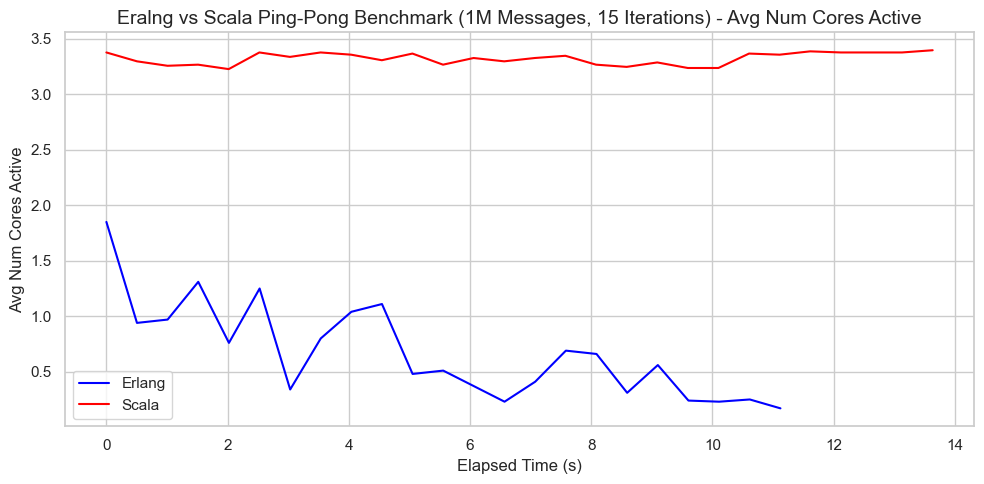

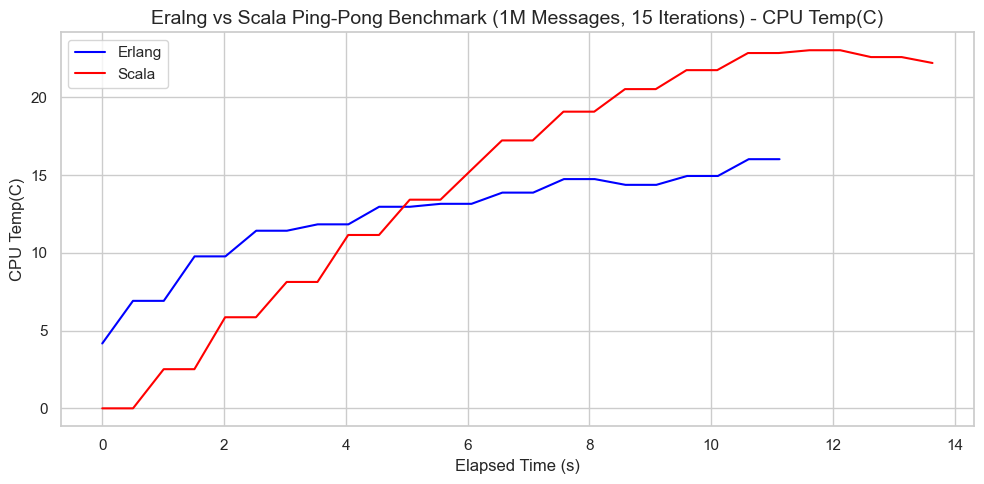

In [38]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [39]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [41]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        32.776129
GT Power(W)               0.022452
DRAM Power(W)             0.134007
(CPUs+GT+SA) Power(W)    33.595000
CPU Temp(C)              14.645857
Avg Num Cores Active      3.322357
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.617630
GT Power(W)               0.025749
DRAM Power(W)            -0.079613
(CPUs+GT+SA) Power(W)    13.192565
CPU Temp(C)              12.355478
Avg Num Cores Active      0.673043
dtype: float64


Compute Total Energy Consumption

In [42]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 475.0658871499999 Joules
Erlang Benchmark: 153.41858364913045 Joules
